#### <B> Data Cleaning

<B>  1. Load the Titanic dataset


In [180]:
import numpy as np

In [181]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset directly
df = sns.load_dataset('titanic')

# Preview
df.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


<B> 2. Initial Inspection

    Use the following to understand the data:

>.head()

>.info()

>.describe(include='all')

In [182]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parch        f

<B>3. Check for Missing Values

In [183]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<B>4. Fix Data Types (if needed)

In [184]:
df.columns = [column.title() for column in df.columns]
df['Survived'] = df['Survived'].replace({0:'No',1:'Yes'}).astype('category')
df.dtypes
df.head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,Adult_Male,Deck,Embark_Town,Alive,Alone
0,No,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,Yes,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,Yes,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,Yes,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,No,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<B> 5. remove unnessesory columns

In [185]:
df.drop(['Pclass','Who'],axis=1,inplace=True)

#### <B> Univariet analysis

Sex
male      577
female    314
Name: count, dtype: int64


Text(0, 0.5, 'Number of pessenger')

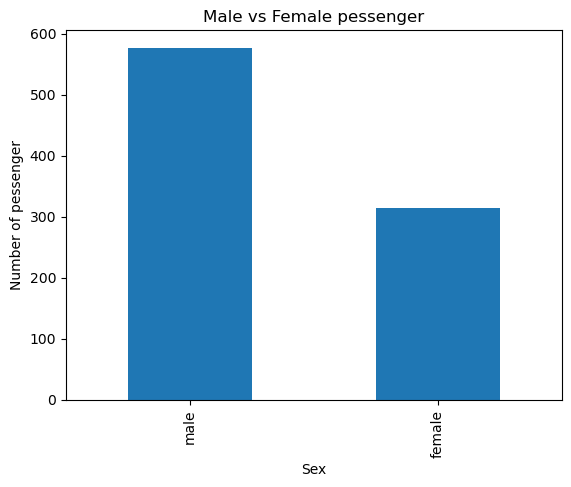

In [186]:
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind='bar')
plt.title('Male vs Female pessenger')
plt.ylabel('Number of pessenger')

Class
Third     491
First     216
Second    184
Name: count, dtype: int64


Text(0, 0.5, 'Number of pessenger')

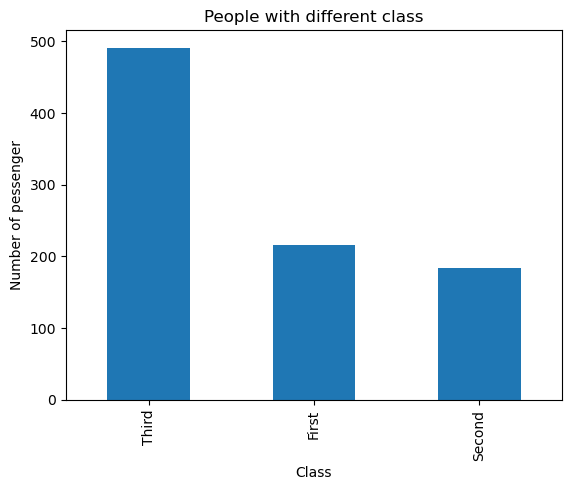

In [187]:
print(df['Class'].value_counts())
df['Class'].value_counts().plot(kind='bar')
plt.title('People with different class')
plt.ylabel('Number of pessenger')

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Text(0, 0.5, 'Number of pessenger')

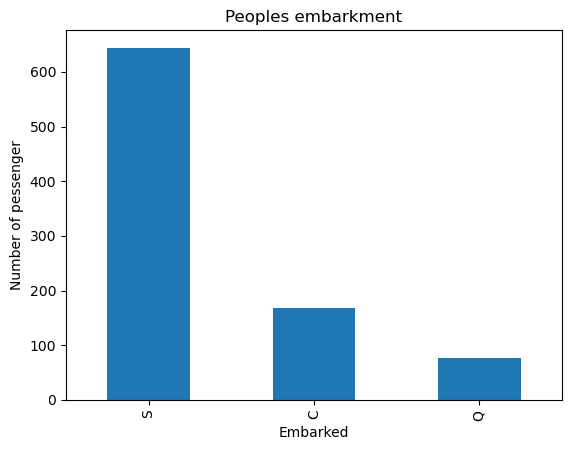

In [188]:
print(df['Embarked'].value_counts())
df['Embarked'].value_counts().plot(kind='bar')
plt.title('Peoples embarkment')
plt.ylabel('Number of pessenger')

Survived
No     549
Yes    342
Name: count, dtype: int64


Text(0, 0.5, 'Number of pessenger')

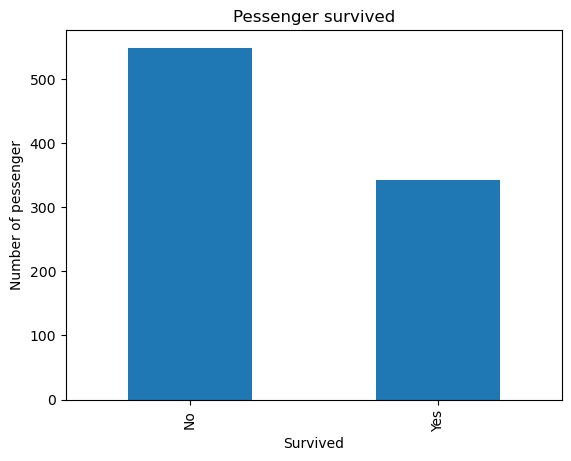

In [189]:
print(df['Survived'].value_counts())
df['Survived'].value_counts().plot(kind='bar')
plt.title('Pessenger survived')
plt.ylabel('Number of pessenger')

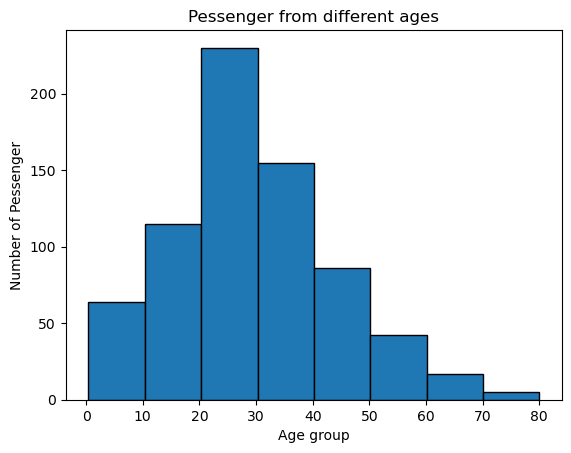

In [190]:
plt.hist(df['Age'],bins=8,edgecolor='black')
plt.title('Pessenger from different ages')
plt.ylabel('Number of Pessenger')
plt.xlabel('Age group')
plt.show()

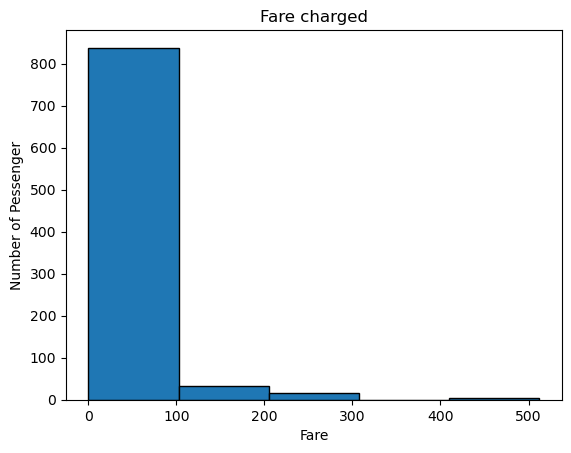

In [191]:
plt.hist(df['Fare'],bins=5,edgecolor='black')
plt.title('Fare charged')
plt.ylabel('Number of Pessenger')
plt.xlabel('Fare')
plt.show()

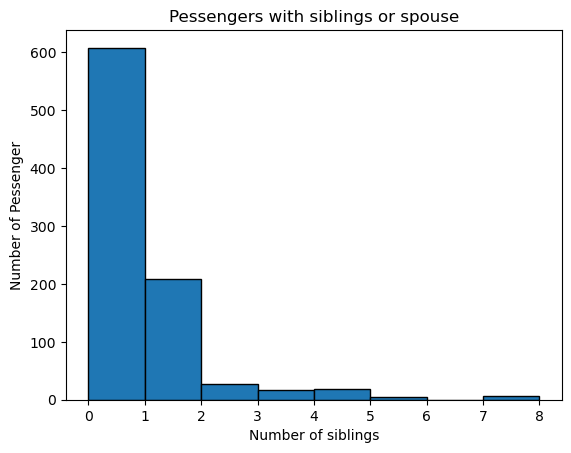

In [192]:
plt.hist(df['Sibsp'],bins=8,edgecolor='black')
plt.title('Pessengers with siblings or spouse')
plt.ylabel('Number of Pessenger')
plt.xlabel('Number of siblings')
plt.show()

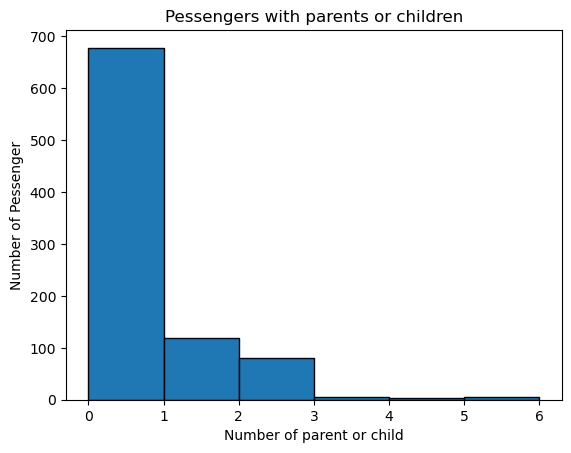

In [193]:
plt.hist(df['Parch'],bins=6,edgecolor='black')
plt.title('Pessengers with parents or children')
plt.ylabel('Number of Pessenger')
plt.xlabel('Number of parent or child')
plt.show()

#### <B> Bivariate analysis

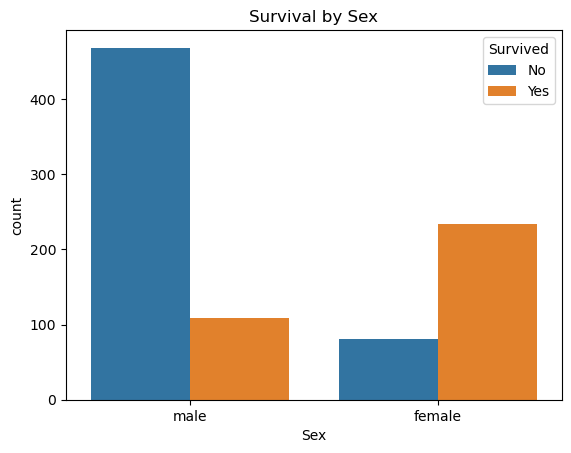

In [194]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()


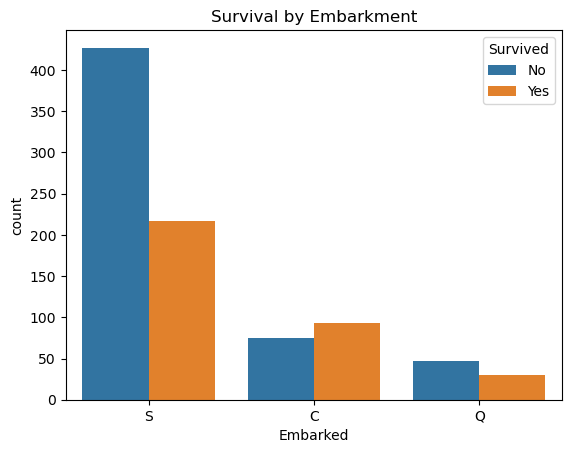

In [195]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkment')
plt.show()


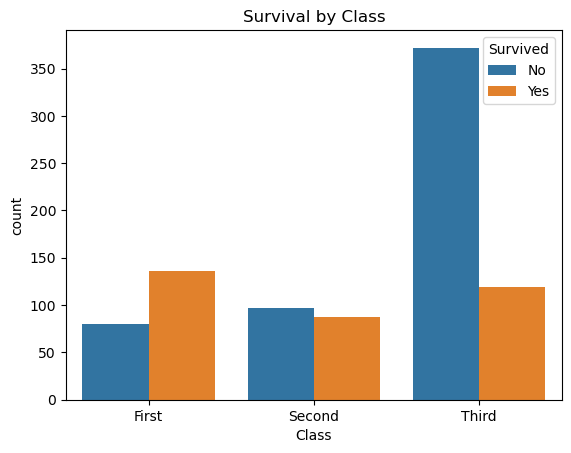

In [196]:
sns.countplot(x='Class', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()


C:\Users\khani\AppData\Local\Temp\ipykernel_2164\1791036947.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Survived','Sex']).size().unstack().plot(kind='bar')


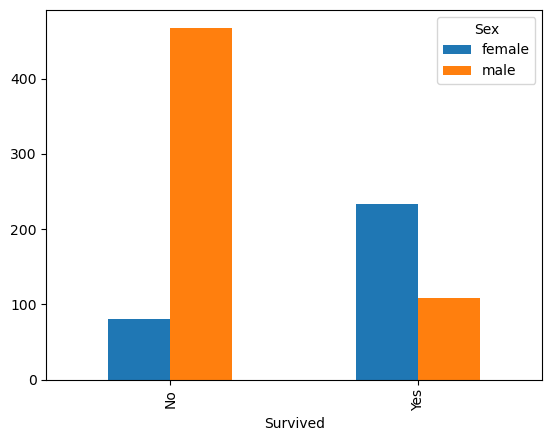

In [197]:
df.groupby(['Survived','Sex']).size().unstack().plot(kind='bar')
plt.show()

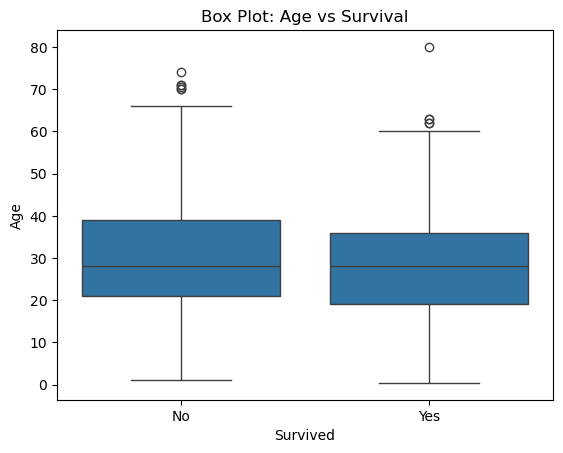

In [198]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Box Plot: Age vs Survival')
plt.show()


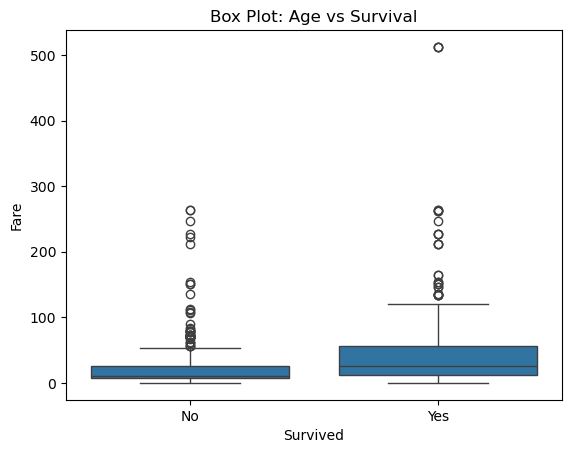

In [199]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Box Plot: Age vs Survival')
plt.show()


<Axes: xlabel='Survived', ylabel='Age'>

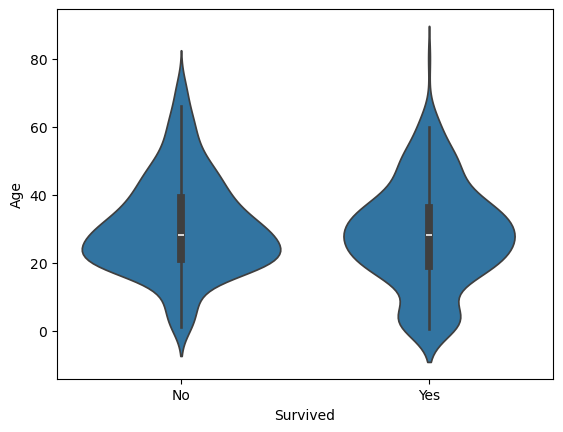

In [200]:
sns.violinplot(x='Survived', y='Age', data=df)

<Axes: xlabel='Survived', ylabel='Fare'>

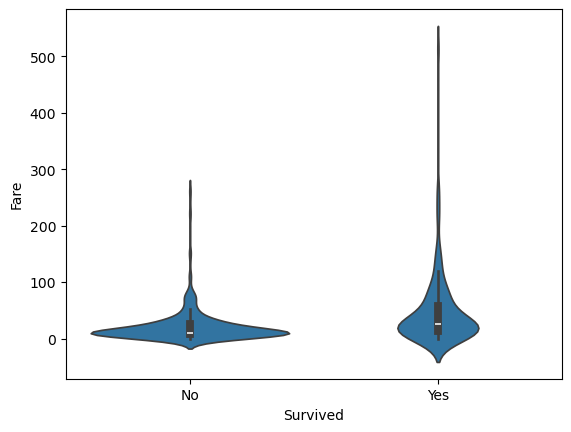

In [201]:
sns.violinplot(x='Survived', y='Fare', data=df)

C:\Users\khani\AppData\Local\Temp\ipykernel_2164\1001874612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df['Survived'] = temp_df['Survived'].replace({'No':0,'Yes':1}).astype('int64')
C:\Users\khani\AppData\Local\Temp\ipykernel_2164\1001874612.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  temp_df['Survived'] = temp_df['Survived'].replace({'No':0,'Yes':1}).astype('int64')


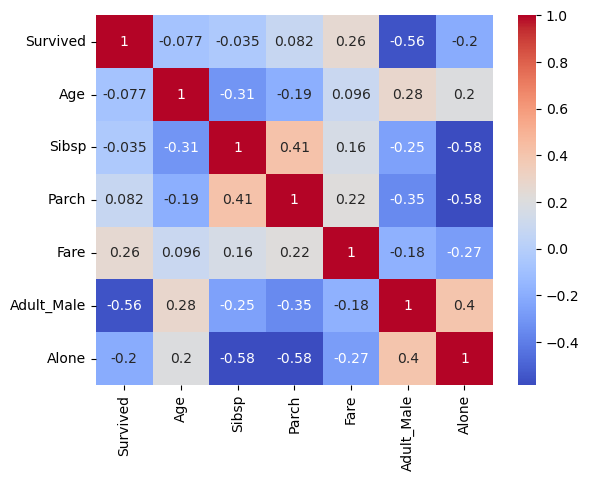

In [202]:
temp_df = df.copy()
temp_df['Survived'] = temp_df['Survived'].replace({'No':0,'Yes':1}).astype('int64')
temp_df.corr(numeric_only=True)
sns.heatmap(temp_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

#### <B> Feature Engineering

In [203]:
df['Family_size'] = df['Sibsp'] + df['Parch'] + 1  

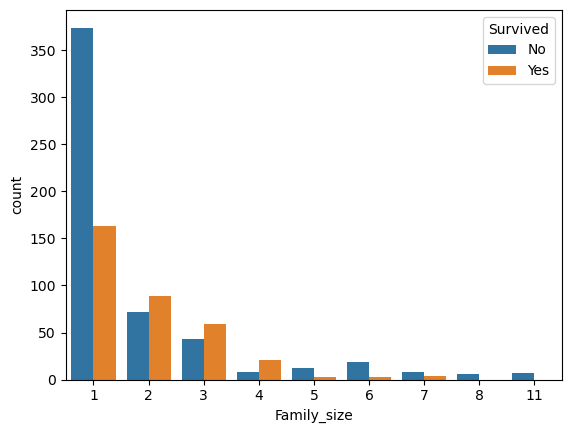

In [204]:
sns.countplot(x=df['Family_size'],hue=df['Survived'])
plt.show()

In [205]:
def age_group(age):
    if age <13:
        return 'Child'
    elif (age >13) and (age < 20):
        return 'Teen'
    elif (age > 20) and (age <50):
        return 'Adult'
    elif age > 50:
        return 'Senior'
    else:
        return np.nan
df['Age_group'] = [age_group(i) for i in df['Age']]

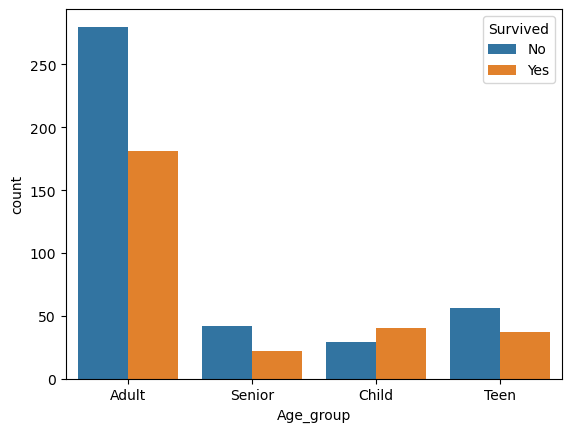

In [206]:
sns.countplot(x='Age_group', hue='Survived', data=df)
plt.show()

In [207]:
df['Fare_bin'] = pd.cut(df['Fare'], bins=[0,10,50,100,1000], labels=['Low', 'Medium', 'High', 'Very High'])

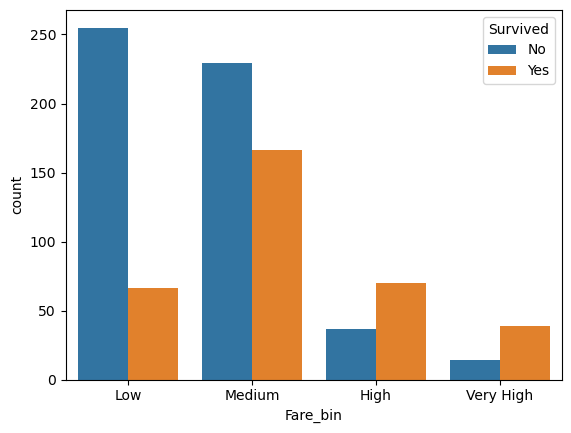

In [208]:
sns.countplot(x= df['Fare_bin'],hue =df['Survived'])
plt.show()

In [209]:
df.head(10)

,Survived,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Adult_Male,Deck,Embark_Town,Alive,Alone,Family_size,Age_group,Fare_bin
0,No,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,no,False,2,Adult,Low
1,Yes,female,38.0,1,0,71.2833,C,First,False,C,Cherbourg,yes,False,2,Adult,High
2,Yes,female,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,yes,True,1,Adult,Low
3,Yes,female,35.0,1,0,53.1000,S,First,False,C,Southampton,yes,False,2,Adult,High
4,No,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,no,True,1,Adult,Low
5,No,male,NaN,0,0,8.4583,Q,Third,True,NaN,Queenstown,no,True,1,NaN,Low
6,No,male,54.0,0,0,51.8625,S,First,True,E,Southampton,no,True,1,Senior,High
7,No,male,2.0,3,1,21.0750,S,Third,False,NaN,Southampton,no,False,5,Child,Medium
8,Yes,female,27.0,0,2,11.1333,S,Third,False,NaN,Southampton,yes,False,3,Adult,Medium
9,Yes,female,14.0,1,0,30.0708,C,Second,False,NaN,Cherbourg,yes,False,2,Teen,Medium
